Entrega final: 16/05

## Projeto 4
Ana Capriles e Lucas Chen Alba

## Introdução

O objetivo deste projeto é criar um contexto prático cuja hipótese principal seja a comparação de médias em duas situações 
distintas (situação A e situação B) e aplicar uma técnica inferencial adequada que compare essas médias populacionais.

A base de dados escolhida é a australia.soybeans, extraída do pacote Agridat. Esta base de dados consiste na
produção, em toneladas métricas por hectare e outras características de 58 variedades genéticas diferentes de soja, em quatro 
localidades diferentes da Austrália, durante dois anos. 

A característica escolhida para o teste é a produção de soja em toneladas por hectare em duas localidades diferentes 
(inserir localidades), ao longo de um mesmo ano (inserir ano).

Description
Yield and other traits of 58 varieties of soybeans, grown in four locations across two years in Australia.
This is four-way data of Year x Loc x Gen x Trait.
Format
A data frame with 464 observations on the following 10 variables.
env Factor with 8 levels, first character of location and last two characters of year
loc Four locations: Brookstead, Lawes, Nambour, RedlandBay
year Year: 1970 or 1971
gen Genotype factor of soybeans, 1-58
yield Yield, metric tons / hectare
height Height, in meters.
lodging Lodging
size Seed size in millimeters
protein Protein in percentage
oil Oil, in percentage


Measurement are available from four locations in Queensland, Australia in two consecutive years
1970, 1971.
The 58 different genotypes of soybeans consisted of 43 lines (40 local Australian selections from a
cross, their two parents, and one other which was used a parent in earlier trials) and 15 other lines
of which 12 were from the US.
Lines 1-40 were local Australian selections from Mamloxi (CPI 172) and Avoyelles (CPI 15939).
No. Line
1-40 Local selections
41 Avoyelles (CPI 15939) Tanzania
42 Hernon 49 (CPI 15948) Tanzania
43 Mamloxi (CPI 172) Nigeria
44 Dorman USA
45 Hampton USA
46 Hill USA
47 Jackson USA
48 Leslie USA
49 Semstar Australia
50 Wills USA
51 C26673 Morocco
52 C26671 Morocco
53 Bragg USA
54 Delmar USA
55 Lee USA
56 Hood USA
57 Ogden USA
58 Wayne USA
Note on the data in Basford and Tukey book. The values for line 58 for Nambour 1970 and Redland
Bay 1971 are incorrectly listed on page 477 as 20.490 and 15.070. They should be 17.350 and
13.000, respectively. In the data set made available here, these values have been corrected.

## Análises descritiva e inferencial e explicação dos resultados

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib import pyplot

In [5]:
d = pd.read_table("australia.soybean.txt", sep="\t")

In [37]:
d

,env,loc,year,gen,yield,height,lodging,size,protein,oil
0,L70,Lawes,1970,G01,2.387,1.445,4.25,8.45,36.70,13.030
1,L70,Lawes,1970,G02,2.282,1.450,4.25,9.95,37.55,13.060
2,L70,Lawes,1970,G03,2.567,1.460,3.75,10.85,37.80,13.395
3,L70,Lawes,1970,G04,2.877,1.260,3.50,10.05,38.45,13.615
4,L70,Lawes,1970,G05,2.392,1.335,3.50,11.00,37.50,13.880
5,L70,Lawes,1970,G06,2.408,1.360,4.00,11.75,38.25,14.075
6,L70,Lawes,1970,G07,2.699,1.300,3.00,11.75,37.35,14.230
7,L70,Lawes,1970,G08,2.457,0.955,3.25,10.00,35.20,14.320
8,L70,Lawes,1970,G09,2.567,1.030,3.00,11.25,35.90,14.640
9,L70,Lawes,1970,G10,2.984,1.155,3.75,10.85,39.70,14.730


In [38]:
d.describe()

,year,yield,height,lodging,size,protein,oil
count,464.00000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,1970.50000,2.047427,0.883125,2.309806,11.137716,40.328341,19.916843
std,0.50054,0.752248,0.272058,0.975984,4.454504,2.927556,2.674354
min,1970.00000,0.282000,0.250000,1.000000,4.000000,33.200000,13.030000
25%,1970.00000,1.515000,0.707500,1.500000,7.837500,38.137500,17.972500
50%,1970.50000,2.074500,0.887500,2.250000,9.500000,40.250000,19.825000
75%,1971.00000,2.557500,1.045000,3.000000,14.050000,42.200000,22.085000
max,1971.00000,4.381000,1.730000,4.750000,23.600000,48.500000,26.845000


In [9]:
def normal(var):
    d['{}'.format(var)].plot.hist(color = "SpringGreen", alpha = 0.8, title = var, normed = 1)
    y = sorted(stats.norm.rvs(size = 10000, loc = d['{}'.format(var)].mean(), scale = d['{}'.format(var)].std()))
    plt.plot(y, stats.norm.pdf(y, loc = d['{}'.format(var)].mean(), scale = d['{}'.format(var)].std()), lw = 3, alpha = 0.6)

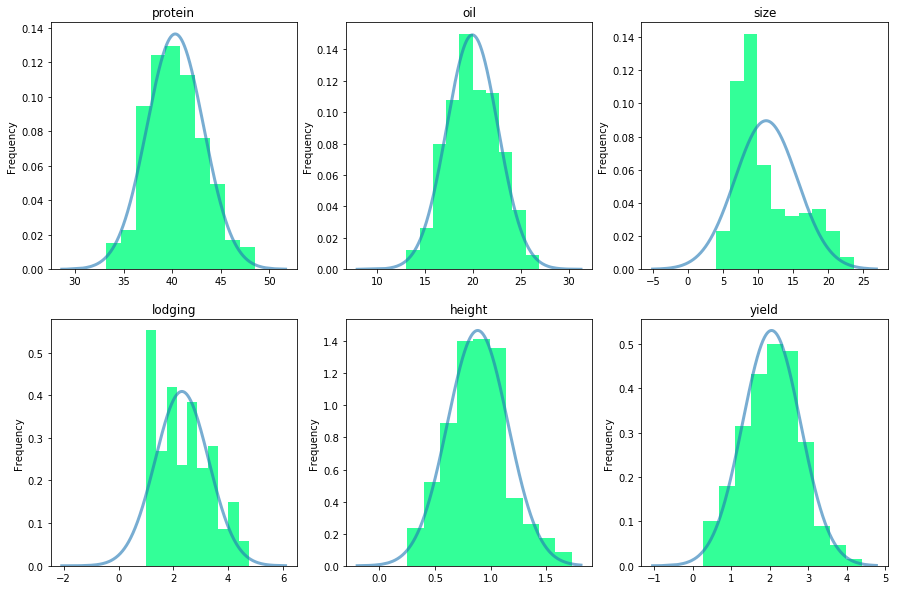

In [40]:
"""
Verificando a aderência dos dados à distribuição normal
(dos fatores: yield, height, lodging, size, protein, oil de todas as cidades como um conjunto)
"""

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
normal('protein')

plt.subplot(2,3,2)
normal('oil')

plt.subplot(2,3,3)
normal('size')

plt.subplot(2,3,4)
normal('lodging')

plt.subplot(2,3,5)
normal('height')

plt.subplot(2,3,6)
d['yield'].plot.hist(color = "SpringGreen", alpha = 0.8, title = 'yield', normed = 1)
y = sorted(stats.norm.rvs(size = 10000, loc = d['yield'].mean(), scale =  d['yield'].std()))
plt.plot(y, stats.norm.pdf(y, loc = d['yield'].mean(), scale = d['yield'].std()), lw = 3, alpha = 0.6)

In [22]:
d['oil'] = sorted(d.oil)


freqrelat = []
for i in range (464):
    freqrelat.append ((i-0.5)/464)

freqnormaloil = []
for i in d['oil']:
    freqnormaloil.append(stats.norm.cdf (i, loc = d['oil'].mean(), scale = d['oil'].std()))

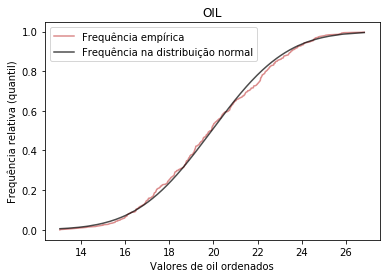

In [24]:
plt.plot (d['oil'], freqrelat, lw = 1.5, color = 'IndianRed', alpha = 0.7, label = 'Frequência empírica')
plt.plot (d['oil'], freqnormaloil, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição normal')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores de oil ordenados')
plt.title ('OIL')

In [34]:
#Separando os datasets em datasets por região
dlawes      = d [(d.env == 'L70') | (d.env == 'L71')]
dbrooksted  = d [(d.env == 'B70') | (d.env == 'B71')]
dnambour    = d [(d.env == 'N70') | (d.env == 'N71')]
dredlandbay = d [(d.env == 'R70') | (d.env == 'R71')]


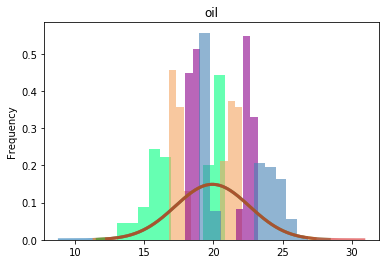

In [47]:


y = sorted(stats.norm.rvs(size = 10000, loc = dlawes['oil'].mean(), scale = dlawes['oil'].std()))
dlawes['oil'].plot.hist(color = "SpringGreen", alpha = 0.6, title = 'yield', normed = 1)
plt.plot(y, stats.norm.pdf(y, loc =  d['oil'].mean(), scale =  d['oil'].std()), lw = 3, alpha = 0.6)

y = sorted(stats.norm.rvs(size = 10000, loc = dbrooksted['oil'].mean(), scale = dbrooksted['oil'].std()))
dbrooksted['oil'].plot.hist(color = "SandyBrown", alpha = 0.6, title = 'yield', normed = 1)
plt.plot(y, stats.norm.pdf(y, loc =  d['oil'].mean(), scale =  d['oil'].std()), lw = 3, alpha = 0.6)

y = sorted(stats.norm.rvs(size = 10000, loc = dnambour['oil'].mean(), scale = dnambour['oil'].std()))
dnambour['oil'].plot.hist(color = "DarkMagenta", alpha = 0.6, title = 'yield', normed = 1)
plt.plot(y, stats.norm.pdf(y, loc = d['oil'].mean(), scale = d['oil'].std()), lw = 3, alpha = 0.6)

y = sorted(stats.norm.rvs(size = 10000, loc = dredlandbay['oil'].mean(), scale = dredlandbay['oil'].std()))
dredlandbay['oil'].plot.hist(color = "SteelBlue", alpha = 0.6, title = 'oil', normed = 1)
plt.plot(y, stats.norm.pdf(y, loc = d['oil'].mean(), scale = d['oil'].std()), lw = 3, alpha = 0.6)

In [69]:
def normal2(dataset, datasetname):
    dataset['oil'].plot.hist(color = "SpringGreen", alpha = 0.8, title = datasetname, normed = 1)
    y = sorted(stats.norm.rvs(size = 10000, loc = dataset['oil'].mean(), scale = dataset['oil'].std()))
    plt.plot(y, stats.norm.pdf(y, loc = dataset['oil'].mean(), scale = dataset['oil'].std()), lw = 3, alpha = 0.6)
    plt.xlim([12,27.5])


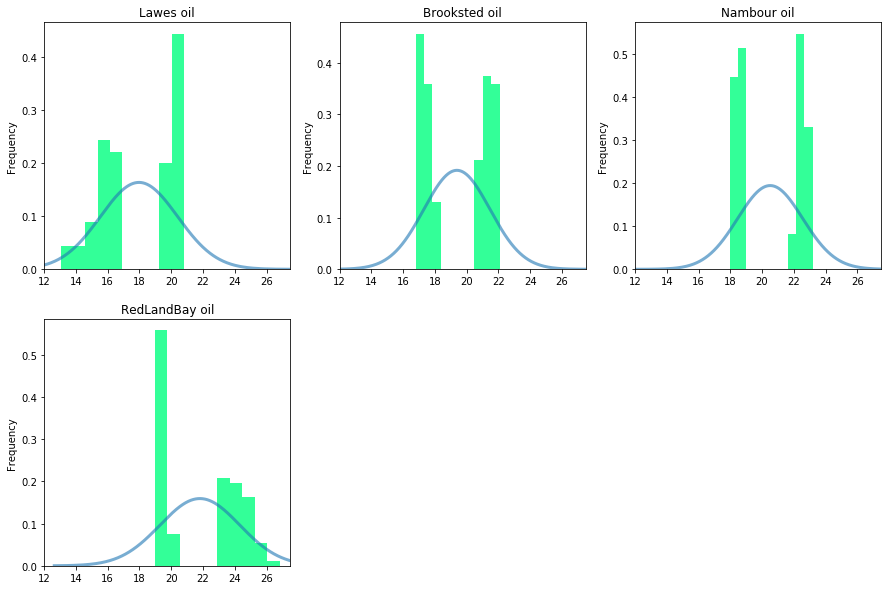

In [71]:
"""
Verificando a aderência dos dados oil à normal,
agora nas quatro cidades separadamente
"""

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
normal2(dlawes, 'Lawes oil')

plt.subplot(2,3,2)
normal2(dbrooksted, 'Brooksted oil')

plt.subplot(2,3,3)
normal2(dnambour, 'Nambour oil')

plt.subplot(2,3,4)
normal2(dredlandbay, 'RedLandBay oil')

## Referências

Basford, K. E., and Tukey, J. W. (1999). Graphical analysis of multiresponse data illustrated with a
plant breeding trial. Chapman and Hall/CRC.
Retrieved from: http://three-mode.leidenuniv.nl/data/soybeaninf.htm.
Used with permission of Kaye Basford, Pieter Kroonenberg.

K E Basford. 1982. The Use of Multidimensional Scaling in Analysing Multi-Attribute Genotype
Response Across Environments, Aust J Agric Res, 33, 473–480.
baker.barley.uniformity 21
Kroonenberg, P. M., & Basford, K. E. B. (1989). An investigation of multi-attribute genotype
response across environments using three-mode principal component analysis. Euphytica, 44, 109–
123.